<a href="https://colab.research.google.com/github/Rakshithadhandre/Machine_Learning_Models/blob/main/Simple_Linear_Regression_Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step1- Reading the dataset

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Salary_Dataset.csv")#technical term-dataframe-df


In [ ]:
df.head(10)#gives top records present in dataset


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df.info()#gives information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  32 non-null     float64
 1   Salary           32 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [ ]:
df.shape#static method that is predefined in the class  #2D- rows and columns

(35, 2)

step2- visualize


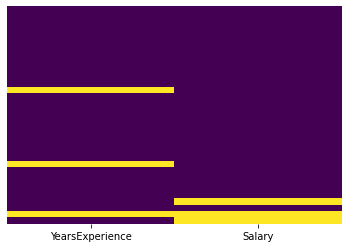

In [ ]:
#To see whether our dataset is having missing values
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show()
get_heatmap(df)


Step 3:Pre-Processing


In [ ]:
#deleting the records having NAN values-more no. of records
'''
df=df.dropna()'''#dropna() method to del the missing values

#replacing the values of column with the median of values-less no. of records in dataset
#df.YearExperience #accesing the col value
median_years=df['YearsExperience'].median()

In [ ]:
median_years

4.7

In [ ]:
mean_sal=df['Salary'].mean()
print(mean_sal)

76336.03125


In [ ]:
import math
mean_sal=math.floor(df['Salary'].mean())
print(mean_sal)

76336


In [ ]:
#replacing NaN values
df['YearsExperience']=df['YearsExperience'].fillna(median_years)

df['Salary']=df['Salary'].fillna(mean_sal)

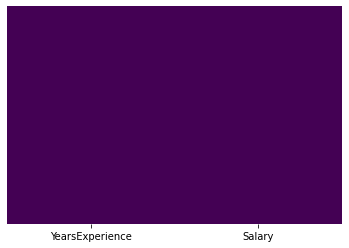

In [ ]:
#to see whether we have missing values or not
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show()
get_heatmap(df)

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Step 4:Preparing the data


In [ ]:
#loading the data into x and y
#x=independent variable-yrs of expe
#y=dependent variable-salary
'''
X=df['YearsExperience']
Y=df['Salary']
'''
#values-2D -datframe-for feeding the ml model we need to feed 2D data only
X=df.iloc[:,:-1].values #iloc==>index location
Y=df.iloc[:,1:].values
     

In [ ]:
#method 2 for loading the data into x and y
import numpy as np
train_x=df[['YearsExperience']]

In [ ]:
train_x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [ ]:
Y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.],
       [105582.],
       [ 76336.],
       [ 57081.],
       [ 76336.],
       [ 76336.]])

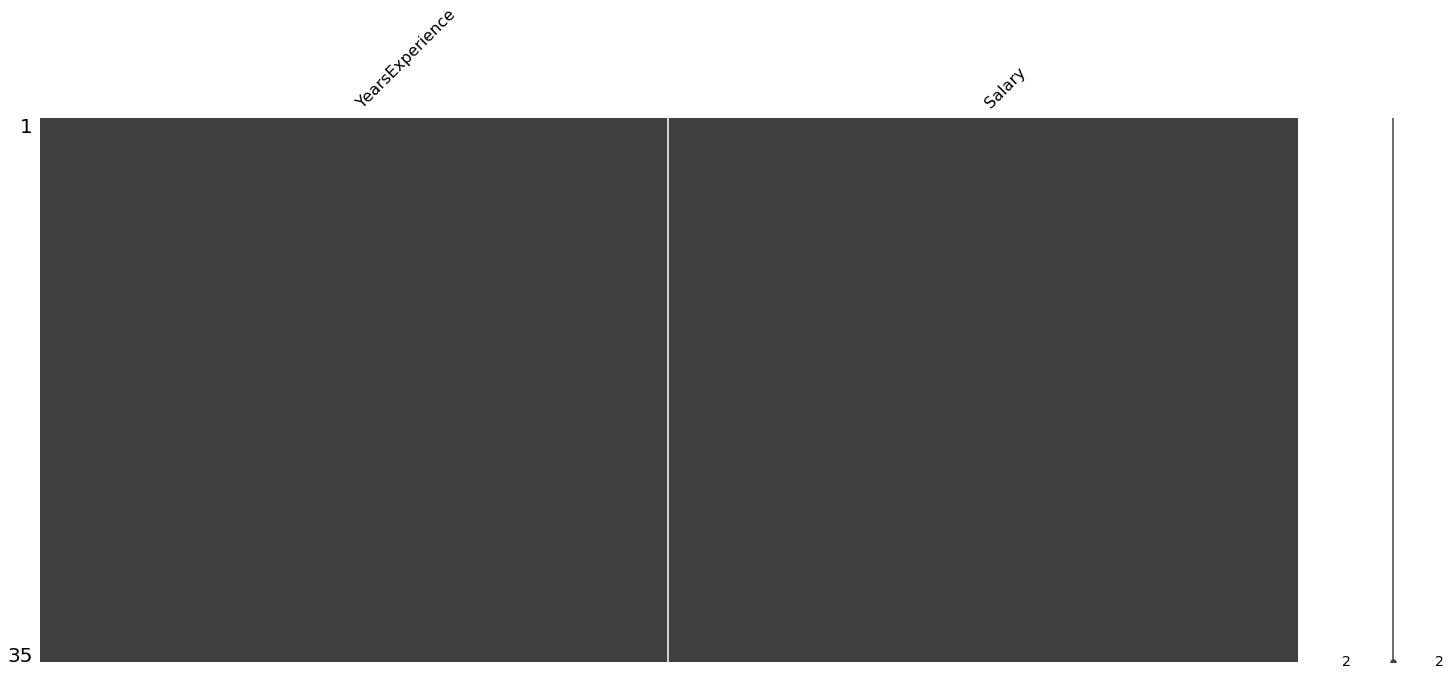

In [ ]:
#To plot the null values using visualization techniques
import missingno as msno
msno.matrix(df)

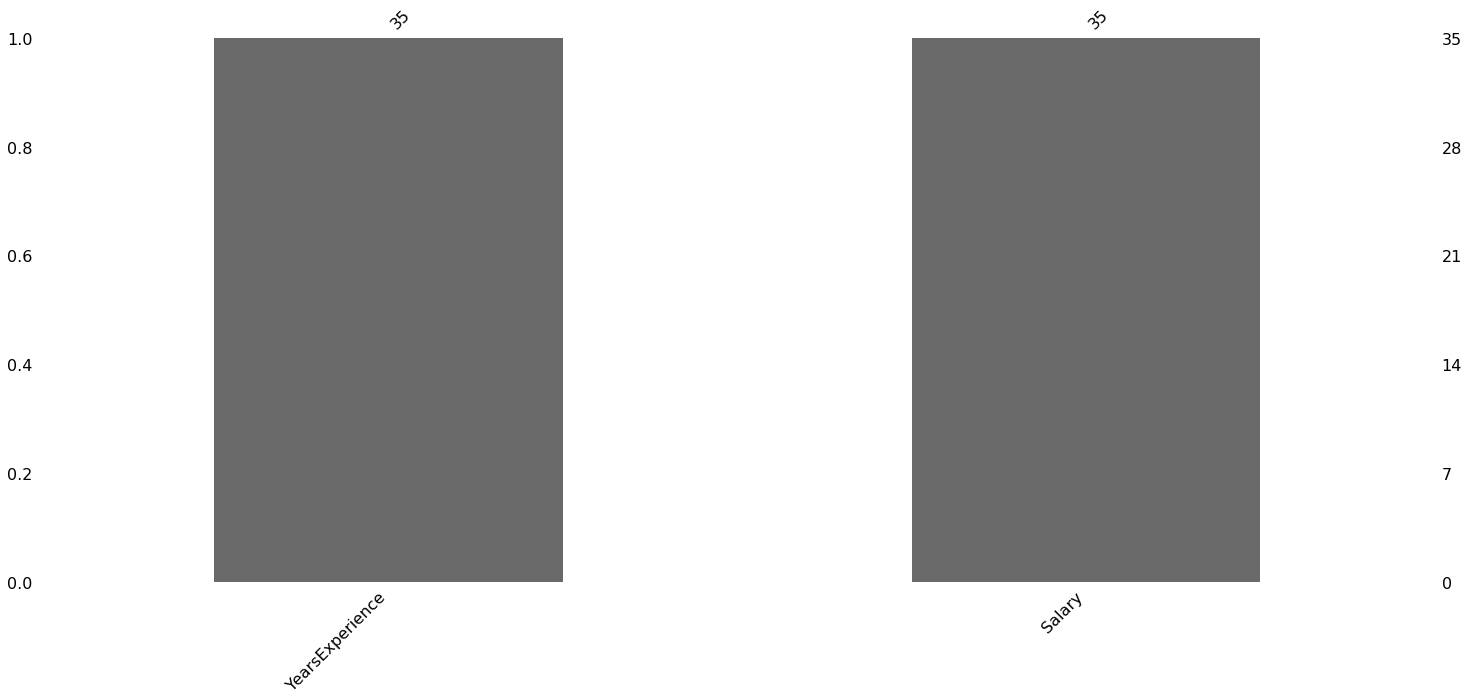

In [ ]:
msno.bar(df)

In [ ]:
#Training and Testing the dataset
#more data-Trainig; Less data-Testing datai.e Test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
X_train

array([[9.5],
       [4.1],
       [9.5],
       [9. ],
       [3.2],
       [4.7],
       [2.9],
       [5.3],
       [4.5],
       [4. ],
       [8.7],
       [1.3],
       [4. ],
       [3. ],
       [8.2],
       [2.2],
       [5.9],
       [7.1],
       [6. ],
       [3.7],
       [3.2],
       [4.7],
       [2. ],
       [1.1]])

In [ ]:
X_test

array([[10.5],
       [ 6.8],
       [ 5.1],
       [10.3],
       [ 7.9],
       [ 4.9],
       [ 3.9],
       [ 1.5],
       [ 4. ],
       [ 9.6],
       [ 4.7]])

In [ ]:
Y_train

array([[ 76336.],
       [ 57081.],
       [116969.],
       [105582.],
       [ 64445.],
       [ 57081.],
       [ 56642.],
       [ 83088.],
       [ 61111.],
       [ 76336.],
       [109431.],
       [ 46205.],
       [ 56957.],
       [ 60150.],
       [113812.],
       [ 39891.],
       [ 81363.],
       [ 98273.],
       [ 93940.],
       [ 57189.],
       [ 54445.],
       [ 76336.],
       [ 43525.],
       [ 39343.]])

In [ ]:
Y_test  

array([[121872.],
       [ 91738.],
       [ 66029.],
       [122391.],
       [101302.],
       [ 67938.],
       [ 63218.],
       [ 37731.],
       [ 55794.],
       [112635.],
       [105582.]])

**TRAINING** Step 6: Fitting the Algorithm/ feeding the model




**Linear** **Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
     

***Fitting*** ***The*** ***Algorithm***

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

**Testing** *Step*-7:Testing the model

In [ ]:
y_pred=model.predict(X_test) #Y_pred=ans script

Step-8: Model evaluation

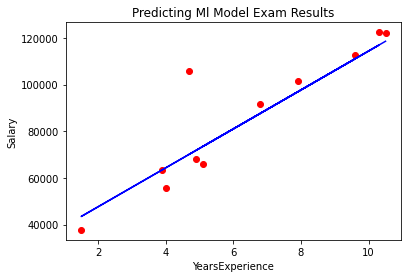

In [ ]:
import matplotlib.pyplot as plt
#visualizing the test results
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Predicting Ml Model Exam Results')
plt.show()

Step 9: Analysing

In [ ]:
#to see the performance
accuracy=model.score(X_test,Y_test)
print("Test accuracy is:",accuracy)
     

Test accuracy is: 0.8212076550363367


In [ ]:
model.predict(X_train)

array([[110189.36612279],
       [ 65156.02266078],
       [110189.36612279],
       [106019.61209853],
       [ 57650.46541711],
       [ 70159.72748989],
       [ 55148.61300255],
       [ 75163.432319  ],
       [ 68491.82588019],
       [ 64322.07185593],
       [103517.75968398],
       [ 41805.40012492],
       [ 64322.07185593],
       [ 55982.56380741],
       [ 99348.00565972],
       [ 49310.95736859],
       [ 80167.13714812],
       [ 90174.54680634],
       [ 81001.08795297],
       [ 61820.21944137],
       [ 57650.46541711],
       [ 70159.72748989],
       [ 47643.05575888],
       [ 40137.49851521]])

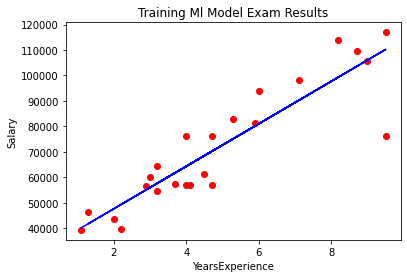

In [ ]:
import matplotlib.pyplot as plt
#visualizing the test results
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='blue')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Training Ml Model Exam Results')
plt.show()

In [ ]:
model.score(X_train,Y_train)

0.8098159560681051

In [ ]:
accuracy_train=model.score(X_train,Y_train)
print("Test accuracy is:",accuracy_train)

Test accuracy is: 0.8098159560681051


In [ ]:
print(model.score(X,Y)*100)

82.64290710660246


Step 9: Deployment

In [ ]:
import math as m
years=float(input("Enter of Experience of the Employee:"))
y_Res=model.predict([[years]])
print("Salary estimated by Model:",m.floor(y_Res))

Enter of Experience of the Employee:5
Salary estimated by Model: 72661
